In [57]:
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = 'visionapi-295811-6a8bc765fdb3.json'

In [65]:
def detect_faces(path):
    """Detects faces in an image."""
    from google.cloud import vision
    import io
    from matplotlib import pyplot as plt 
    
    im
    client = vision.ImageAnnotatorClient()
    
    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.face_detection(image=image)
    faces = response.face_annotations
    
    # Names of likelihood from google.cloud.vision.enums
    likelihood_name = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 'POSSIBLE',
                       'LIKELY', 'VERY_LIKELY')
    print('Faces:')
    
    for face in faces:
        print('anger: {}'.format(likelihood_name[face.anger_likelihood]))
        print('joy: {}'.format(likelihood_name[face.joy_likelihood]))
        print('surprise: {}'.format(likelihood_name[face.surprise_likelihood]))
        print('sorrow: {}'.format(likelihood_name[face.sorrow_likelihood]))


        vertices = (['({},{})'.format(vertex.x, vertex.y)
                    for vertex in face.bounding_poly.vertices])

        
        print('face bounds: {}'.format(','.join(vertices)))
#         print(vertices)
        
    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

    print(vertices[1])
    

In [66]:
import io
import os
import cv2 as cv

# Imports the Google Cloud client library
from google.cloud import vision

# Instantiates a client
client = vision.ImageAnnotatorClient()

# The name of the image file to annotate
file_name = os.path.abspath('faces.jpg')

# Loads the image into memory
with io.open(file_name, 'rb') as image_file:
    content = image_file.read()

image = vision.Image(content=content)

# Performs label detection on the image file
response = client.label_detection(image=image)
labels = response.label_annotations

# response = client.face_detection(image=image)

response = detect_faces(file_name) #call function

# faceAnnotations = response.face_detection

# print(len(response.faceAnnotations))

# print('Labels:')
# for label in labels:
#     print(label.description)


Faces:
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
face bounds: (356,345),(494,345),(494,505),(356,505)
anger: VERY_UNLIKELY
joy: VERY_UNLIKELY
surprise: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
face bounds: (362,169),(506,169),(506,336),(362,336)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
face bounds: (190,0),(331,0),(331,159),(190,159)
anger: VERY_UNLIKELY
joy: UNLIKELY
surprise: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
face bounds: (188,174),(323,174),(323,331),(188,331)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
face bounds: (9,350),(148,350),(148,512),(9,512)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
face bounds: (192,348),(325,348),(325,503),(192,503)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surprise: VERY_UNLIKELY
sorrow: VERY_UNLIKELY
face bounds: (11,182),(143,182),(143,335),(11,335)
anger: VERY_UNLIKELY
joy: VERY_LIKELY
surpris

Possibility of anger: VERY_UNLIKELY
Possibility of joy: VERY_UNLIKELY
Possibility of surprise: VERY_UNLIKELY
Possibility of sorrow: VERY_UNLIKELY
Vertices covering face: [(155, 167), (345, 167), (345, 387), (155, 387)]


Confidence in Detection: 56.49207830429077%


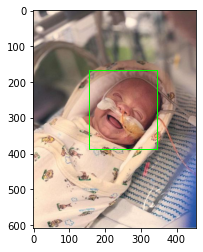

In [130]:
import os 
import io 
from google.cloud import vision 
from matplotlib import pyplot as plt 
from matplotlib import patches as pch 
import cv2
  
client = vision.ImageAnnotatorClient() 
  
f = 'happy preemie baby.jpg'
with io.open(f, 'rb') as image: 
    content = image.read() 
      
image = vision.Image(content = content) 
response = client.face_detection(image = image) 
faces = response.face_annotations 
  
possibility = ('UNKNOWN', 'VERY_UNLIKELY', 'UNLIKELY', 
                  'POSSIBLE', 'LIKELY', 'VERY_LIKELY') 
  
a = plt.imread(f) 
fig, ax = plt.subplots(1) 
ax.imshow(a) 
  
for face in faces: 
    print('Possibility of anger: {}'.format(possibility[face.anger_likelihood])) 
    print('Possibility of joy: {}'.format(possibility[face.joy_likelihood])) 
    print('Possibility of surprise: {}'.format(possibility[face.surprise_likelihood])) 
    print('Possibility of sorrow: {}'.format(possibility[face.sorrow_likelihood])) 
    
    vertices = ([(vertex.x, vertex.y) 
                 for vertex in face.bounding_poly.vertices]) 
  
    print('Vertices covering face: {}\n\n'.format(vertices)) 
  
    rect = pch.Rectangle(vertices[0], (vertices[1][0] - vertices[0][0]), 
                        (vertices[2][1] - vertices[0][1]), linewidth = 1, 
                                       edgecolor = (0,1,0), facecolor ='none') 
    ax.add_patch(rect) 
      
print('Confidence in Detection: {}%'.format( 
            face.detection_confidence * 100)) 
  
plt.show() 

# a = cv.cvtColor(a, cv.COLOR_BGR2RGB)
# cv2.imshow('baby face detection',a)
# cv2.waitKey(0)
# cv2.destroyAllWindows()